In [8]:
import yaml
import sys
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

diagname  = 'teleconnections'
machine   = 'wilma'
telecname = 'ENSO'

with open(f'../../../config/config_{machine}.yml', 'r', encoding='utf-8') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

with open(f'../{diagname}.yml', 'r', encoding='utf-8') as file:
    namelist = yaml.load(file, Loader=yaml.FullLoader)

# Open dataset 2m temperature

infile = config[diagname][telecname]['input']

field = xr.open_mfdataset(infile)[config[diagname][telecname]['var']] # single quantity name to be standardize

## Adapt nino 3.4 coordinates

In [20]:
# import teleconnections tool functions
sys.path.insert(1,'/work/users/mnurisso/AQUA/diagnostics/teleconnections')
from tools import *

# import coordinates from yaml file

lonW = lon_180_to_360(namelist[telecname]['lonW']) # conversion can be inserted as a check in other funcs using coordinates
lonE = lon_180_to_360(namelist[telecname]['lonE'])

latN = namelist[telecname]['latN']
latS = namelist[telecname]['latS']

print('lat',latN,latS)
print('lon',lonW,lonE)


lat 5 -5
lon 190 240


## Evaluate average ssl temperature in region 3.4

In [21]:
# -- regional average
def wgt_areaave(indat, latS, latN, lonW, lonE):
  """ 
    Evaluate the weighted average of a quantity
    on a custom surface.

    Parameters
    ----------
    indat : float (DataArray)
            input data to be averaged
    latS : float
    latN : float
    lonW : float
    lonE : float

    Returns
    -------
    float (DataArray)
  """
  lat=indat.lat
  lon=indat.lon

  iplat = lat.where( (lat >= latS ) & (lat <= latN), drop=True)
  iplon = lon.where( (lon >= lonW ) & (lon <= lonE), drop=True)

  wgt = np.cos(np.deg2rad(lat))
  odat=indat.sel(lat=iplat,lon=iplon).weighted(wgt).mean(("lon", "lat"), skipna=True)
  return(odat)


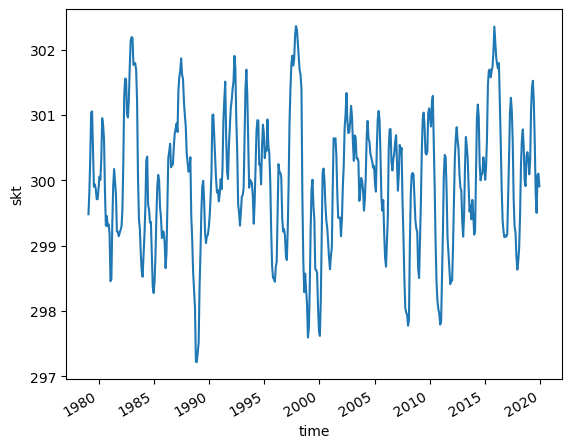

In [22]:
nino = wgt_areaave(field,latS,latN,lonW,lonE)
nino.plot()

## Save index to .nc file

In [23]:
outfile = config[diagname]['output']
filename = '/NINO_old_indx.nc'
outfile = outfile+filename

nino.to_netcdf(outfile)